In [5]:
library(dplyr)
library(magrittr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
###Cleaning Data

lcd_data = read.csv('~/Desktop/Research/Extension_1.18.18_deidentified.csv', stringsAsFactors = FALSE)

comparisons = lcd_data %>% filter(random != 5089 & random != 9502 & random != 6531) %>% select(c(7:206, 397)) %>% slice(3:99)

for (i in 1:200) {
  comparisons[, i] = as.integer(unlist(comparisons[, i]))
}

comparisons = comparisons %>% filter(attcheck1_1 > 90 & attcheck3_1 > 90 & attcheck5_1 > 90 & attcheck7_1 > 90 & attcheck9_1 > 90)

comparisons = comparisons[-c(21,42,63,84,100,121,142,163,184,200)]

comparisons

In [7]:
###Generating vectors of compared numbers
numbers = c(5,14,16,9,29,8,11,20,18,21)
numbers2 = c(7,25,12,17,28,6,13,4,27,10)
num_mat = matrix(0,10,10)
for (i in 1:10) {
  num_mat[i,] = numbers
  numbers = numbers[c(2:10, 1)]
}

for (j in 1:10) {
  num_mat = cbind(num_mat, numbers2)
  numbers2 = numbers2[c(2:10,1)]
}

colnames(num_mat) = rep(NULL, 20)

In [8]:
###Generating vectors of compared fields
field1 <- c(rep(1, 10), rep(c(1, 11), 5))
field2 <- c(2,16,3,17,4,18,5,19,6,20,11,rep(12:15, each = 2), 16)

In [9]:
###Changing columns into numbers that are compared
x = 0
f1 = 1
f2 = 1
while (i + x <= 190) {
  if (x == 80 | x == 185) {
    for (i in 1:5) {
    colnames(comparisons)[i + x] = paste0(num_mat[i, field1[f1]], "/", num_mat[i, field2[f2]])
    }
    f1 = f1 + 1
    f2 = f2 + 1
    x = x + 5
    next
  } else {
    for (i in 1:10) {
    colnames(comparisons)[i + x] = paste0(num_mat[i, field1[f1]], "/", num_mat[i, field2[f2]])
    }
  }
  x = x + 10
  f1 = f1 + 1
  f2 = f2 + 1
  i = 5
}

In [10]:
###Creating Table
comp = data.frame(simrating = integer(),
                  I = integer(),
                  J = integer(),
                  I_measure = character(),
                  J_measure = character(),
                  ID = integer(),
                  stringsAsFactors = F)
for (i in 1:84) {
  part = comparisons[i, ]
  for (j in 1:190) {
    sim = as.integer(part[, j])
    nums = as.integer(unlist(strsplit(colnames(part)[j], "/")))
    lst = list()
    lst[[1]] = sim
    lst[[2]] = nums[1]
    lst[[3]] = nums[2]
    lst[[4]] = ifelse(is.element(nums[1], numbers), "A", "B")
    lst[[5]] = ifelse(is.element(nums[2], numbers), "A", "B")
    lst[[6]] = as.integer(part[, 191])
    comp[190 * (i-1)+j, ] = lst
  }
}

In [11]:
###Converting Table to CSV
write.csv(comp, file = '~/Desktop/Research/Comparisons.csv', row.names = F)

In [12]:
###Creating Table of Demographics and Scores
demo = lcd_data %>% slice(3:102) %>% filter(random != 5089 & random != 9502 & random != 6531)

for (i in 1:200) {
  demo[, i] = as.integer(unlist(demo[, i]))
}

demo = demo %>% filter(attcheck1_1 > 90 & attcheck3_1 > 90 & attcheck5_1 > 90 & attcheck7_1 > 90 & attcheck9_1 > 90) %>% select(367:395)

demo[, c(1,2,14:29)] = as.integer(unlist(demo[, c(1,2,14:29)]))

colnames(demo)[1] = "anxiety"
colnames(demo)[14:21] = paste0("r", 0:7)
colnames(demo)[22:29] = paste0("w", 0:7)

demo = demo %>% mutate(score = r0+r1+r2+r3+r4+r5+r6+r7-w0-w1-w2-w3-w4-w5-w6-w7)

Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”


Call:
lm(formula = demo$score ~ demo$anxiety)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.744  -3.062   2.583   3.602   7.218 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.0143     1.3042  36.816   <2e-16 ***
demo$anxiety  -0.6540     0.2712  -2.411   0.0181 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.861 on 82 degrees of freedom
Multiple R-squared:  0.0662,	Adjusted R-squared:  0.05482 
F-statistic: 5.814 on 1 and 82 DF,  p-value: 0.01814



Call:
lm(formula = demo$score ~ demo$age, data = demo)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.602  -2.549   2.547   4.074   5.164 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 43.72966    2.48470  17.600   <2e-16 ***
demo$age     0.04256    0.06602   0.645    0.521    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.05 on 82 degrees of freedom
Multiple R-squared:  0.005042,	Adjusted R-squared:  -0.007092 
F-statistic: 0.4155 on 1 and 82 DF,  p-value: 0.521


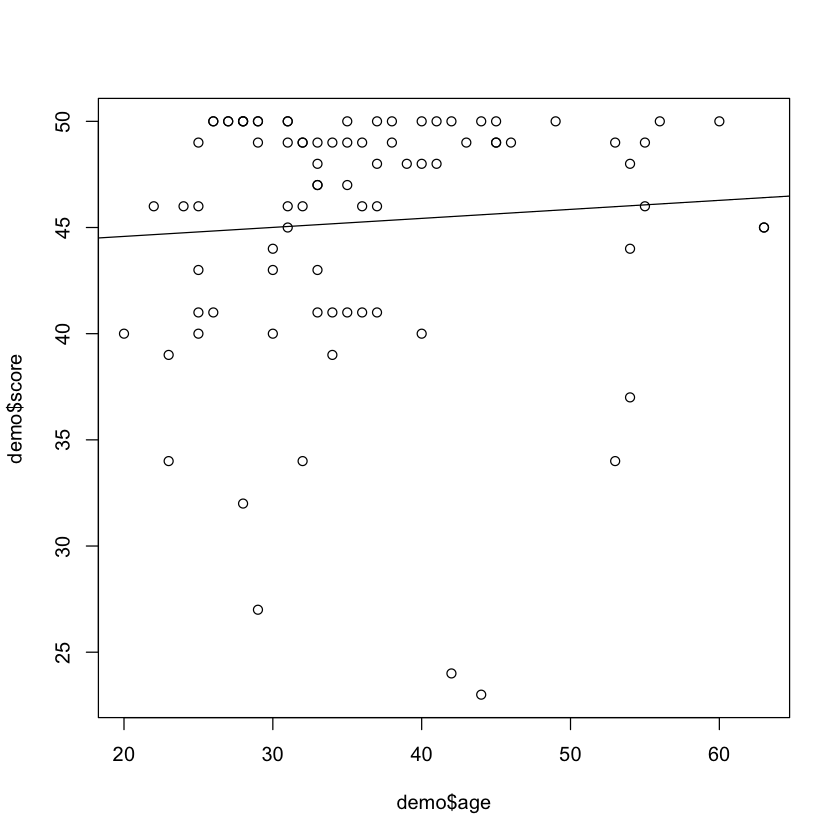

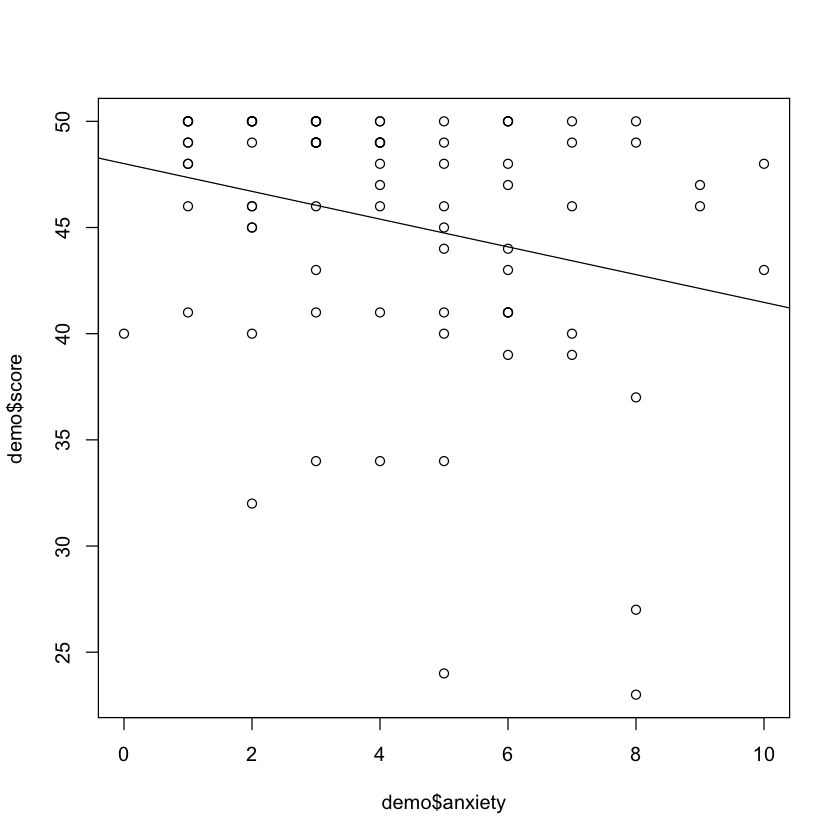

In [13]:
###Attempt at Regression Analysis
score_vs_anxiety = lm(demo$score ~ demo$anxiety)
summary(score_vs_anxiety)

score_vs_age = lm(demo$score ~ demo$age, demo)
summary(score_vs_age)

plot(demo$age, demo$score)
abline(score_vs_age)

plot(demo$anxiety, demo$score)
abline(score_vs_anxiety)

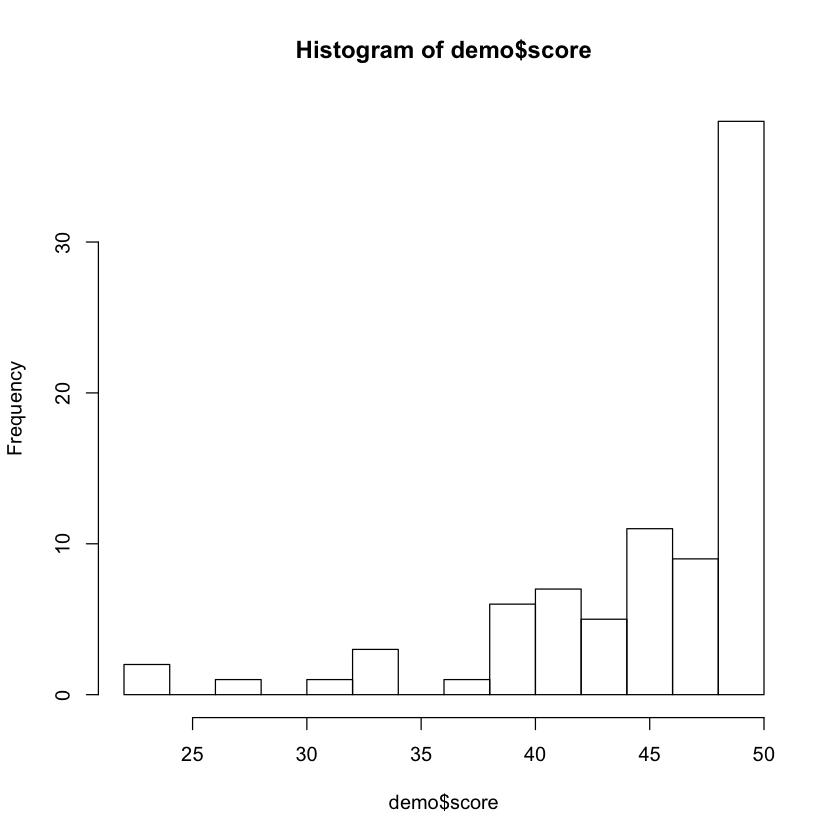

In [14]:
###Misc Analysis
hist(demo$score, breaks = 10)
males = demo %>% filter(gender == "Male")
females = demo %>% filter(gender == "Female")
whites = demo %>% filter(ethnicity == "White")
blacks = demo %>% filter(ethnicity == "Black or African American")
latinos = demo %>% filter(ethnicity == "Hispanic or Latino")
asians = demo %>% filter(ethnicity == "Asian")
math_daily = demo %>% filter(math_freq == "Daily")
math_weekly = demo %>% filter(math_freq == "Weekly")
math_yearly = demo %>% filter(math_freq == "Yearly")
math_hourly = demo %>% filter(math_freq == "Hourly")
math_rarely = demo %>% filter(math_freq == "Less than once a year") 
sem5 = demo %>% filter(college_semesters == "5 or more")
sem4 = demo %>% filter(college_semesters == "4")
sem3 = demo %>% filter(college_semesters == "3")
sem2 = demo %>% filter(college_semesters == "2")
sem1 = demo %>% filter(college_semesters == "1")
sem0 = demo %>% filter(college_semesters == "0")

In [15]:
cat("Overall Mean:", mean(demo$score), "\n")
cat("Overall SD:", sd(demo$score), "\n")
cat("Maximum Score:", max(demo$score), "\n")
cat("Minimum Score:", min(demo$score), "\n")
cat("Mean of Males:", mean(males$score), "\n")
cat("Mean of Females:", mean(females$score), "\n")
cat("Mean of White Participants:", mean(whites$score), "\n")
cat("Mean of Black/African American Participants:", mean(blacks$score), "\n")
cat("Mean of Hispanic/Latino Participants:", mean(latinos$score), "\n")
cat("Mean of Asian Participants:", mean(asians$score), "\n")
cat("Mean of Participants who use math hourly:", mean(math_hourly$score), "\n")
cat("Mean of Participants who use math daily:", mean(math_daily$score), "\n")
cat("Mean of Participants who use math weekly:", mean(math_weekly$score), "\n")
cat("Mean of Participants who use math yearly:", mean(math_yearly$score), "\n")
cat("Mean of Participants who use math less than once a year:", mean(math_rarely$score), "\n")
cat("Mean of Participants with 5+ college semesters:", mean(sem5$score), "\n")
cat("Mean of Participants with 4 college semesters:", mean(sem4$score), "\n")
cat("Mean of Participants with 3 college semesters:", mean(sem3$score), "\n")
cat("Mean of Participants with 2 college semesters:", mean(sem2$score), "\n")
cat("Mean of Participants with 1 college semester:", mean(sem1$score), "\n")
cat("Mean of Participnats with no college:", mean(sem0$score), "\n")

Overall Mean: 45.27381 
Overall SD: 6.028749 
Maximum Score: 50 
Minimum Score: 23 
Mean of Males: 44.5 
Mean of Females: 46.41176 
Mean of White Participants: 45.24638 
Mean of Black/African American Participants: 44.16667 
Mean of Hispanic/Latino Participants: 45.75 
Mean of Asian Participants: 46.6 
Mean of Participants who use math hourly: 40.33333 
Mean of Participants who use math daily: 45.5 
Mean of Participants who use math weekly: 46.35294 
Mean of Participants who use math yearly: 48 
Mean of Participants who use math less than once a year: 42.16667 
Mean of Participants with 5+ college semesters: 46.4 
Mean of Participants with 4 college semesters: 43.5 
Mean of Participants with 3 college semesters: 47.75 
Mean of Participants with 2 college semesters: 42.5 
Mean of Participants with 1 college semester: 46 
Mean of Participnats with no college: 44.14286 


In [16]:
#- All native speakers of English.
#- 50 males, 34 females.
#- 69 white, 6 Black/African American, 4 Hispanic/Latino, 5 Asian.
#- 3 use math hourly, 32 use math daily, 34 use math weekly, 3 use math yearly, 12 use math less than once a year.
#- 40 had 5 or more semesters of college, 12 had 4 semesters, 4 had 3 semesters, 8 had 2 semesters, 4 had 1 semester, 14 had none.
#- Out of 50 possible points, the average score was 45.27, with an SD of 6.03.

In [44]:
###Creating 3D matrix of all 84 participants, 20 numbers
numbers3 = as.character(c(numbers, numbers2))

all_sim_mat = array(0, dim = c(20,20,84))

for (i in 1:84) {
  ind = comparisons[i, ]
  ind_sim_mat = matrix(0,20,20)
  rownames(ind_sim_mat) = numbers3
  colnames(ind_sim_mat) = numbers3
  for (j in 1:20) {
    ind_sim_mat[j, j] = 100
  }
  for (k in 1:190) {
    nums = unlist(strsplit(names(ind)[k], split = "/"))
    ind_sim_mat[nums[1], nums[2]] = ind[[k]]
    ind_sim_mat[nums[2], nums[1]] = ind[[k]]
  }
  all_sim_mat[,,i] = ind_sim_mat
}

###Accessing matrices
all_sim_mat[,,1]

100,35,2,15,16,28,26,74,43,37,27,62,18,15,23,54,34,17,15,58
35,100,75,22,15,48,29,41,46,88,63,23,52,38,79,29,52,43,18,55
2,75,100,43,15,75,22,24,46,21,20,13,42,54,54,20,43,38,39,56
15,22,43,100,34,55,19,18,47,23,23,15,22,19,20,70,20,10,19,59
16,15,15,34,100,29,37,5,26,17,36,25,36,19,33,14,25,16,63,15
28,48,75,55,29,100,29,54,18,29,47,26,54,23,24,48,48,64,11,80
26,29,22,19,37,29,100,28,51,14,12,30,80,13,13,17,17,18,20,21
74,41,24,18,5,54,28,100,64,65,13,18,36,38,50,19,18,59,18,94
43,46,46,47,26,18,51,64,100,48,20,9,40,68,56,67,19,20,54,18
37,88,21,23,17,29,14,65,48,100,73,30,44,21,60,26,13,19,13,20
27,63,20,23,36,47,12,13,20,73,100,14,26,39,83,62,16,11,16,10


In [45]:
###Creating 3D matrix of all 84 participants, 2 groups of 10 numbers
comp = comparisons[,-191]
all_sim_mat1 = array(0, dim = c(10,10,84))
all_sim_mat2 = array(0, dim = c(10,10,84))

for (i in 1:84) {
  ind_sim_mat1 = matrix(0,10,10)
  ind_sim_mat2 = matrix(0,10,10)
  rownames(ind_sim_mat1) = as.character(numbers)
  colnames(ind_sim_mat1) = as.character(numbers)
  rownames(ind_sim_mat2) = as.character(numbers2)
  colnames(ind_sim_mat2) = as.character(numbers2)
  
  ind1_1 = comp[i, c(1:10, 21:30, 41:50, 61:70, 81:85)]
  ind1_2 = comp[i, c(106:115, 126:135, 146:155, 166:175, 186:190)]
  
  for (j in 1:10) {
    ind_sim_mat1[j, j] = 100
    ind_sim_mat2[j, j] = 100
  }
  
  for (k in 1:45) {
    nums1 = unlist(strsplit(names(ind1_1)[k], split = "/"))
    nums2 = unlist(strsplit(names(ind1_2)[k], split = "/"))
    ind_sim_mat1[nums1[1], nums1[2]] = ind1_1[[k]]
    ind_sim_mat1[nums1[2], nums1[1]] = ind1_1[[k]]
    ind_sim_mat2[nums2[1], nums2[2]] = ind1_2[[k]]
    ind_sim_mat2[nums2[2], nums2[1]] = ind1_2[[k]]
  }
  
  all_sim_mat1[,,i] = ind_sim_mat1
  all_sim_mat2[,,i] = ind_sim_mat2
}

###Accessing matrices
all_sim_mat1[,,1]
all_sim_mat2[,,1]

100,35,2,15,16,28,26,74,43,37
35,100,75,22,15,48,29,41,46,88
2,75,100,43,15,75,22,24,46,21
15,22,43,100,34,55,19,18,47,23
16,15,15,34,100,29,37,5,26,17
28,48,75,55,29,100,29,54,18,29
26,29,22,19,37,29,100,28,51,14
74,41,24,18,5,54,28,100,64,65
43,46,46,47,26,18,51,64,100,48
37,88,21,23,17,29,14,65,48,100


100,14,26,39,83,62,16,11,16,10
14,100,22,25,52,8,34,23,43,19
26,22,100,19,32,74,52,82,20,71
39,25,19,100,16,23,20,21,40,19
83,52,32,16,100,21,20,91,53,31
62,8,74,23,21,100,12,54,13,34
16,34,52,20,20,12,100,23,20,23
11,23,82,21,91,54,23,100,13,10
16,43,20,40,53,13,20,13,100,13
10,19,71,19,31,34,23,10,13,100
